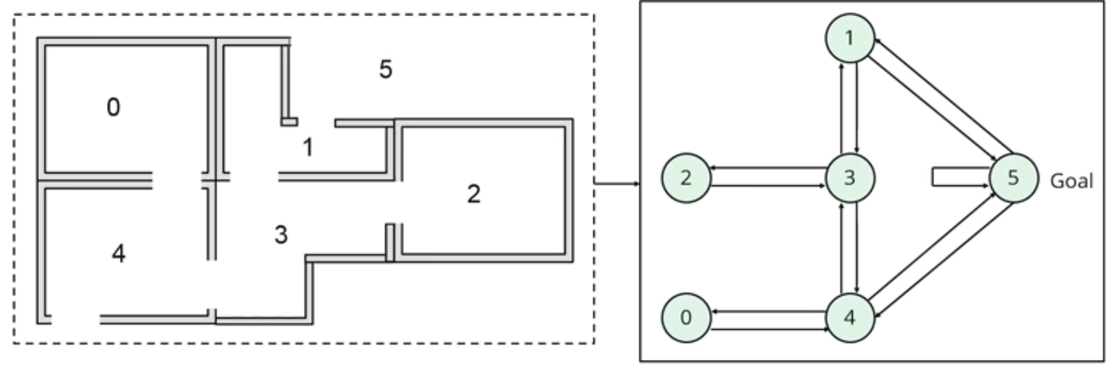

In [1]:
import numpy as np

#R Matrix
R = np.matrix([[-1, -1, -1, -1, 0, -1], 
              [-1, -1, -1, 0, -1, 100],
              [-1, -1, -1, 0, -1, -1],
              [-1, 0, 0, -1, 0, -1],
              [-1, 0, 0, -1, -1, 100],
              [-1, 0, -1, -1, 0, 100]])

In [2]:
#Q Matrix
Q = np.matrix(np.zeros([6,6]))

In [3]:
#Gamma: Learning Parameter
gamma = 0.8

In [4]:
#Initial State
initial_state = 1

In [5]:
#This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [6]:
#Get available actions in the current state
available_act = available_actions(initial_state)


In [7]:
#This function chooses at random which action to perform within the range of all available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

In [8]:
#Sample next action to be performed
action = sample_next_action(available_act)

In [9]:
#This function updates the Q matrix according to the path selected and the Q learning algorithm
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size =1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    #Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

In [10]:
#Update Q matrix
update(initial_state, action, gamma)

In [11]:
#Training
#Train over 10000 iterations

for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state, action, gamma)

#Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q) * 100)


Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [13]:
#Testing

#Goal State 5
#Best sequence state starting from 2 --> 2,3,1,5

current_state = 2
steps = [current_state]

while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

In [14]:
#Print sequence of steps
print("Selected path:")
print(steps)

Selected path:
[2, 3, 4, 5]
